In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
data = pd.read_csv("kidney_cleaned.csv",index_col=0)


In [6]:
X = data.drop(['classification','id'], axis=1)
y = data['classification']

In [7]:
# Label Encoding for target variable
le = LabelEncoder()
y = le.fit_transform(y)
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))
    label_encoders[feature] = le


In [8]:
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    label_encoders[feature] = le


In [9]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [11]:
#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Apply PCA
pca = PCA(n_components=24) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_pca, y_train)

LogisticRegression(random_state=42)

In [15]:
# Predict on the test set
y_pred = log_reg.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[54  0]
 [ 0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [16]:
X_train_pca

array([[ 2.95819072,  0.84394699, -0.13468602, ..., -0.23834888,
        -0.05312815, -0.31788946],
       [-2.7323078 , -0.17934272,  0.10967576, ...,  0.43714645,
        -0.12584526, -0.15045153],
       [-2.42368068,  0.46233096, -0.31690892, ...,  0.14230212,
        -0.13864352, -0.26746527],
       ...,
       [-2.37841009, -0.22512402,  0.33673054, ...,  0.2242624 ,
         0.28277498,  0.03090064],
       [-2.38191258,  0.40544414, -0.68839678, ..., -0.09577294,
        -0.29370489,  0.08738784],
       [ 0.37234504, -0.43631673, -1.61741465, ...,  0.29405752,
        -0.0465675 ,  0.20995565]])

In [19]:
# Model Evaluation
y_pred = log_reg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[54  0]
 [ 0 26]]


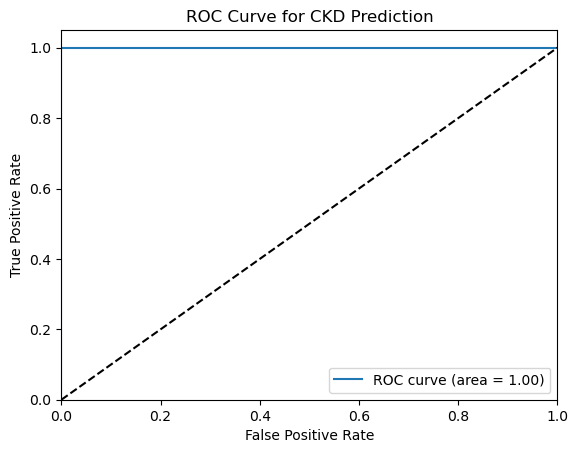

In [20]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CKD Prediction')
plt.legend(loc="lower right")
plt.show()

In [22]:
import shap
explainer =shap.Explainer(log_reg.predict,X_test)

In [23]:
shap_values = explainer(X_test_pca)


/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/p

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/p

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/p

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/p

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/p

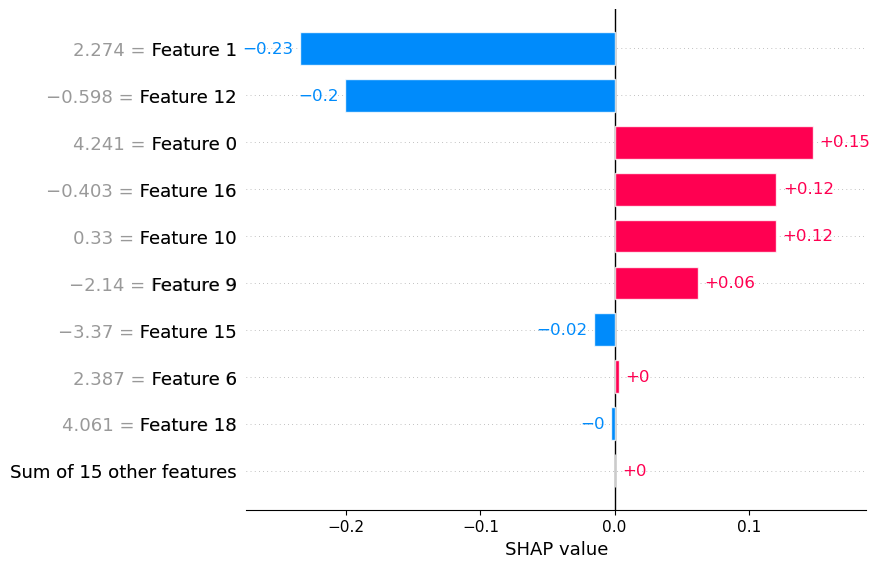

In [24]:
shap.plots.bar(shap_values[2])

In [25]:
import eli5
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


In [27]:
eli5.explain_prediction(log_reg, X_test_df.iloc[0])

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Explanation(estimator='LogisticRegression(random_state=42)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='wc', weight=2952.40886761889, std=None, value=6500.0), FeatureWeight(feature='age', weight=158.30810010817748, std=None, value=50.0), FeatureWeight(feature='bu', weight=102.41437545711435, std=None, value=118.0), FeatureWeight(feature='bgr', weight=13.841424544773478, std=None, value=89.0), FeatureWeight(feature='<BIAS>', weight=4.29409883598334, std=None, value=1.0), FeatureWeight(feature='rc', weight=0.9809607095682111, std=None, value=4.707434944237917), FeatureWeight(feature='pot', weight=0.6843941052003787, std=None, value=4.4), FeatureWeight(feature='pe', weight=0.4479885491749461, std=None, value=1.0), FeatureWeight(feature='htn', weight=0.1414669626021294, std=None, value=1.0), FeatureWeight(feature='ane', weight=0.09512118754212572, std=None, value=1.0)], neg=[FeatureWeight(feature='sod', weight=-53.78113466836548, std=None, value=127.0), FeatureWeight(feature='bp', weight=-21.261362488913708, std=None, value=90.0), FeatureWeight(feature='sc', weight=-5.914882304660362, std=None, value=6.1), FeatureWeight(feature='hemo', weight=-2.115950768684405, std=None, value=6.0), FeatureWeight(feature='pcv', weight=-1.406721547595053, std=None, value=17.0), FeatureWeight(feature='pc', weight=-1.0781257970057059, std=None, value=1.0), FeatureWeight(feature='rbc', weight=-0.19712788092112185, std=None, value=1.0), FeatureWeight(feature='sg', weight=-0.08598431818724145, std=None, value=1.0174079320113314), FeatureWeight(feature='dm', weight=-0.033634876703008215, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=1.0, score=-3147.7418734279904, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)